## <center> 粒子群优化算法
源代码参考：https://github.com/TsiaprasTilemachos/PSO

### 粒子群优化算法流程
1. 初始化每个粒子，即在允许范围内随机设置每个粒子的初始位置和速度。
2. 评价每个粒子的适应度，计算每个粒子的目标函数。
3. 设置每个粒子的Pi。对每个粒子，将其适应度与其经历过的最好位置Pi进行比较，如果优于Pi，则将其作为该粒子的最好位置Pi。
4. 设置全局最优值Pg。对每个粒子，将其适应度与群体经历过的最好位置Pg进行比较，如果优于Pg，则将其作为当前群体的最好位置Pg。
5. 根据式（7.1）更新粒子的速度和位置。
6. 检查终止条件。如果未达到设定条件（预设误差或者迭代的次数），则返回第2步。

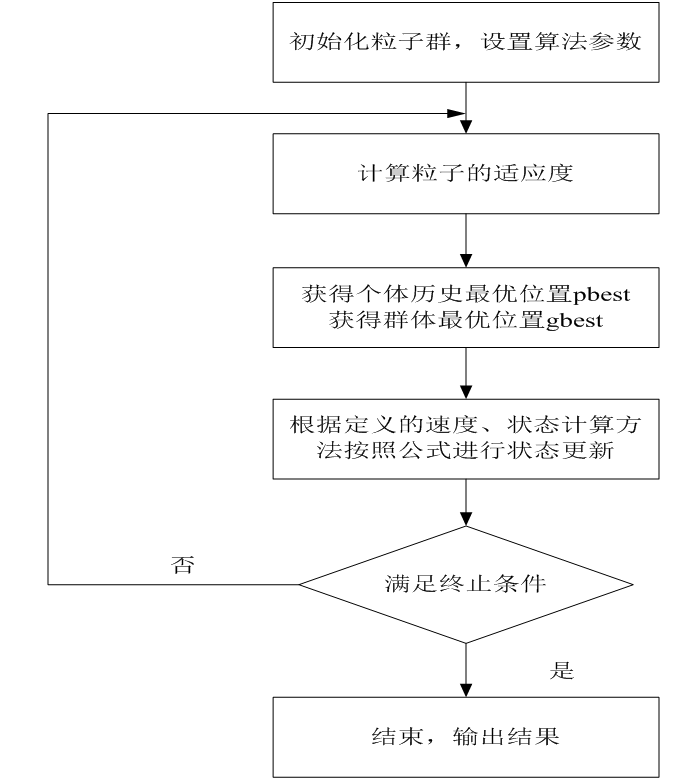

In [3]:
from IPython.display import Image
Image(filename='./img/PSO Process.png', width=500)

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation


#### 求函数的极小值

<IPython.core.display.Javascript object>


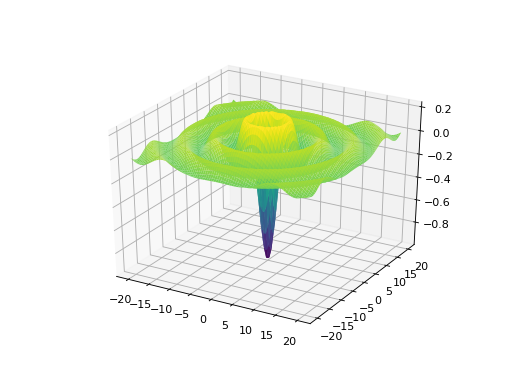

In [3]:
def f(x, y):
    return -np.sin(np.sqrt(x ** 2 + y ** 2))/np.sqrt(x ** 2 + y ** 2)

x = np.linspace(-20, 20, 80)
y = np.linspace(-20, 20, 80)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

## 编码实现

#### 问题定义

In [15]:
# 定义函数
def costFunction(pos):
    x = pos[0]
    y = pos[1]
    return -np.sin(np.sqrt(x ** 2 + y ** 2))/np.sqrt(x ** 2 + y ** 2)

VarSize = 2  #变量 [x,y]的维度
VarMin = -40 #初始粒子群的规模最小值
VarMax =  40 #初始粒子群的规模最大值

#### PSO算法参数定义

In [46]:
#PSO参数定义
maxItr = 100  # 迭代的最大次数
nPop  = 10    # 群体规模

w  = 0.5 #惯性权重
c1 = 1 #个体加速度参数
c2 = 1 #群体加速度参数

Gcosts = maxItr*[0] #记录所有的全局最优值

#### 初始化

In [47]:
#初始化
class Point():
    def __init__(self, newPos, newCost, newVel):
        self.pos = newPos
        self.cost = newCost
        self.Ppos = newPos
        self.Pcost = newCost
        self.vel = newVel
        
    def updatePoint(self,newPos, newCost, newVel):
        if(newCost<self.Pcost):
            self.Ppos = newPos
            self.Pcost = newCost
        self.pos = newPos
        self.cost = newCost
        self.vel = newVel
        

Gpos = [0,0]  #全局最佳位置
Gcost= 0      #全局最优值
points = []#粒子位置列表

for i in range(nPop):
    
    #随机生成初始位置
    newPos = np.random.uniform(VarMin,VarMax,VarSize)
    
    #评估当前位置值
    newCost = costFunction(newPos)
    
    #速度初始化
    newVel = np.zeros(VarSize)
    
    newPoint = Point(newPos,newCost,newVel)

    #查找全局最优位置 & 最优值
    if(i==0):
        Gpos = newPoint.pos
        Gcost= newPoint.cost
    else:
        if(newPoint.cost < Gcost):
            Gpos = newPoint.pos
            Gcost= newPoint.cost
            
    points.append(newPoint)
            

### 主循环

In [48]:
def calculateVelocity(ptcl, w, c1, c2, Gpos, VarSize):
    r1 = np.random.rand(VarSize)
    r2 = np.random.rand(VarSize)
    C = np.array(ptcl.Ppos)-np.array(ptcl.pos)
    S = np.array(Gpos)-np.array(ptcl.pos)
    return (np.array(ptcl.vel)*w + c1*r1*C + c2*r2*S)

np.seterr('raise')

G_posns = []  #全局最优位置
G_costs = []  #全局最优值
for i in range(maxItr):
    for j in range(nPop):
        oldPos = points[j].pos
        newVel = calculateVelocity(points[j],w,c1,c2,Gpos,VarSize)
        newPos = points[j].pos + newVel
        newCost = costFunction(newPos)
        
        if(newCost < Gcost):
            Gpos = newPos
            Gcost= newCost
            
        if(newCost<points[j].Pcost):
            points[j].Ppos = newPos
            points[j].Pcost = newCost
        points[j].pos = newPos
        points[j].cost = newCost
        points[j].vel = newVel
        
    G_posns.append(Gpos)
    G_costs.append(Gcost)
    
G_posns = np.array(G_posns)

<IPython.core.display.Javascript object>


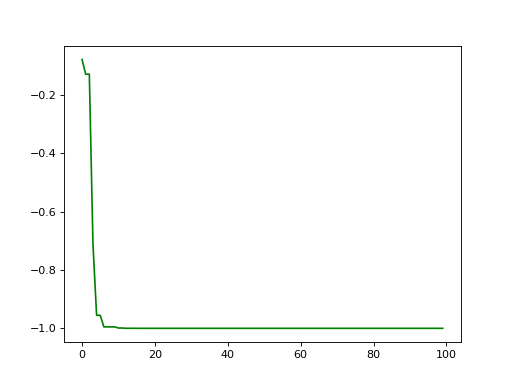

In [50]:
plt.plot(G_costs,color='green')

<IPython.core.display.Javascript object>


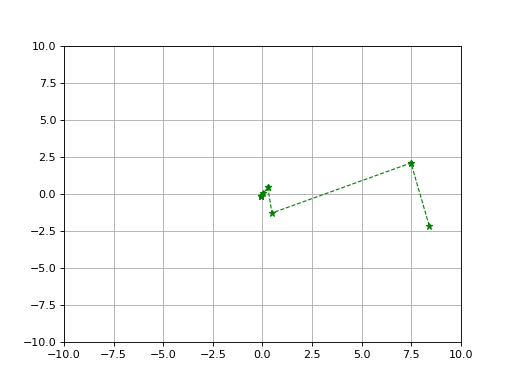

In [51]:
fig = plt.figure()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
ax, = plt.plot([], [],'g*',color='g',linestyle='dashed',linewidth=1 )
plt.grid()
def animate(i):
    global G_posns
    ax.set_data(G_posns[:i,0], G_posns[:i,1])
    return ax

ani = FuncAnimation(fig, animate, frames=20, interval=200)


<IPython.core.display.Javascript object>


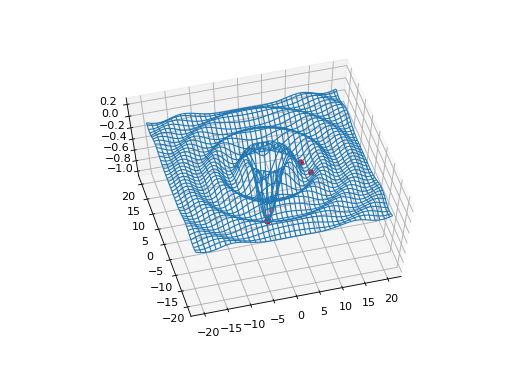

In [52]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z,linewidth=1)
ax.scatter(G_posns[:,0], G_posns[:,1], G_costs,color='red',marker='o');